In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Random Forest Classifier

100%|██████████| 27/27 [01:06<00:00,  2.48s/it]


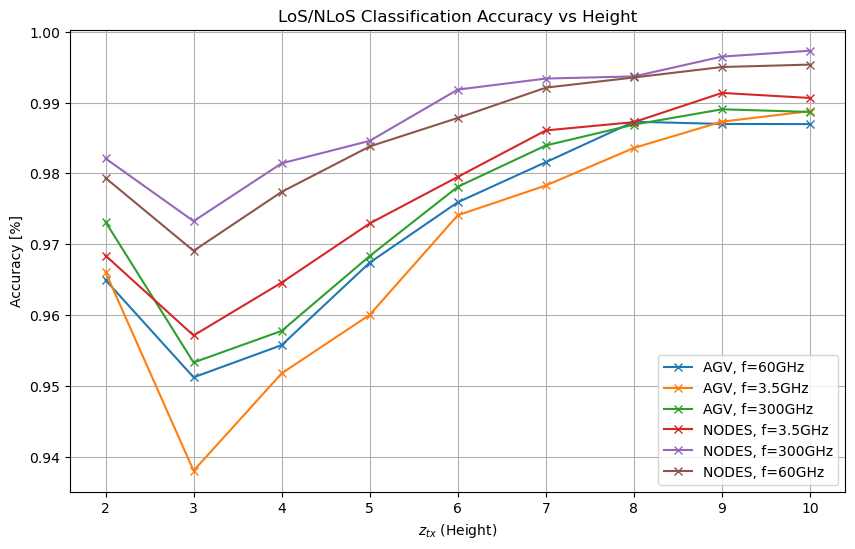

In [38]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}
acc = list()
for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items()):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc.append(accuracies)
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# acc
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, accuracies, marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

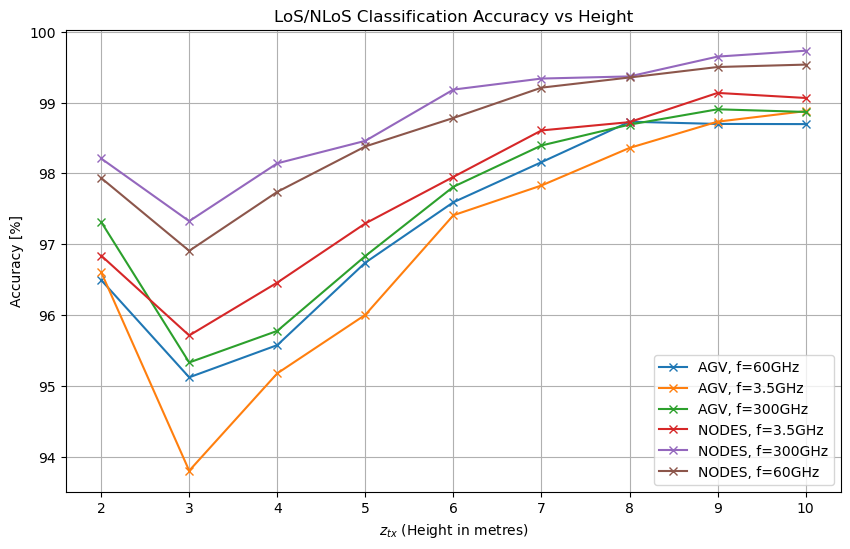

In [39]:
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [45]:
# Mean Accuracies for RF
np.mean(accuracies), np.std(accuracies) 

(0.9859414563445567, 0.008670572404520138)

# K-Nearest Neighbors Classifier

100%|██████████| 27/27 [00:10<00:00,  2.55it/s]


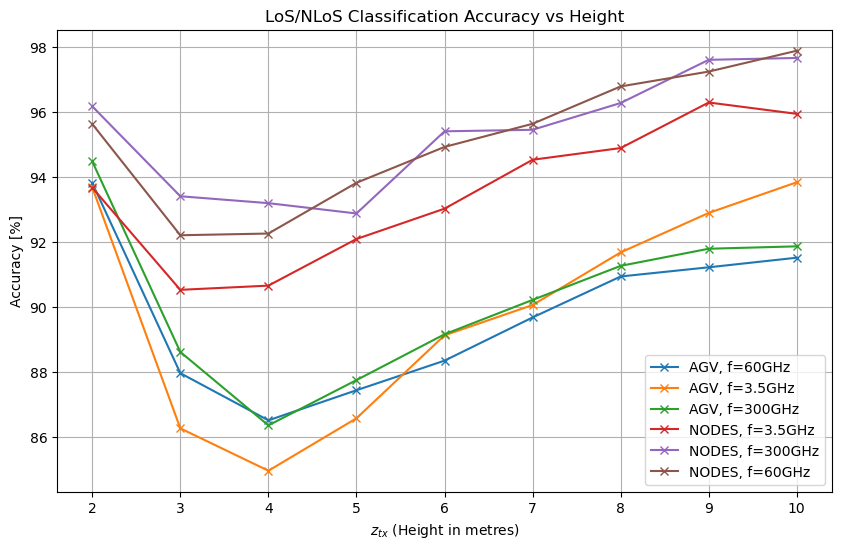

In [22]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items()):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [24]:
# KNN
np.mean(accuracies), np.std(accuracies)

(0.9516037470004846, 0.019377919633970193)

# AdaBoost Classifier

  0%|          | 0/2 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/lib/python3/dist-p

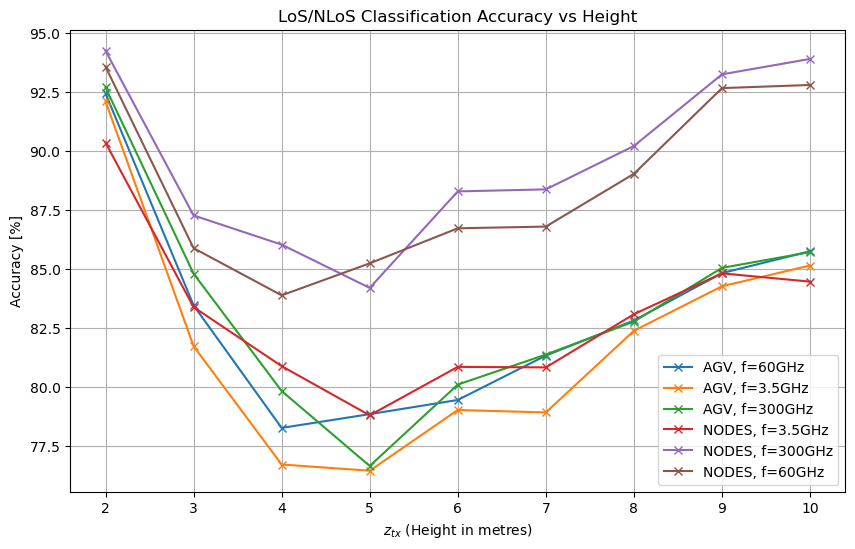

In [28]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
        )
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show() 

In [29]:
# Adaboost
np.mean(accuracies), np.std(accuracies)

(0.885141325027252, 0.034469554073073255)

# Decision Tree Classifier

100%|██████████| 2/2 [00:03<00:00,  1.98s/it]


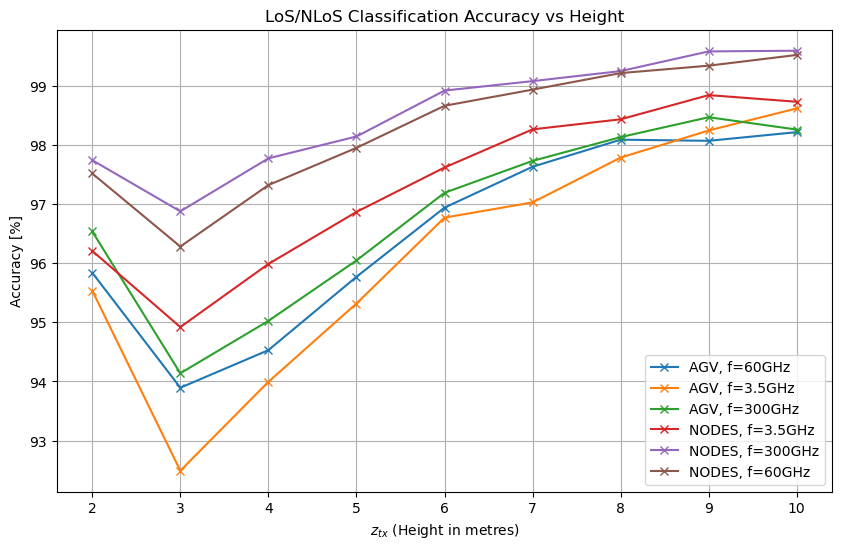

In [30]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [31]:
# Decision Trees
np.mean(accuracies), np.std(accuracies)

(0.9830462863234821, 0.010388830134440566)

# Gradient Boosting Decision Tree Classifier

100%|██████████| 2/2 [01:52<00:00, 56.45s/it]


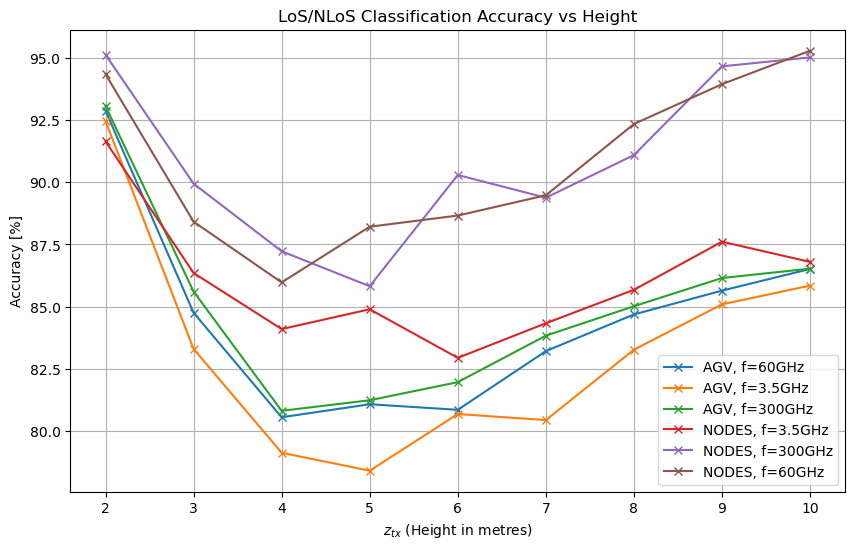

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [34]:
# Gradient Boosting Decision Trees
np.mean(accuracies),np.std(accuracies)

(0.9073349740018446, 0.031038596611157383)

# NN-MLP Classifier

Training models for nodes: 100%|██████████| 27/27 [03:20<00:00,  7.44s/it]


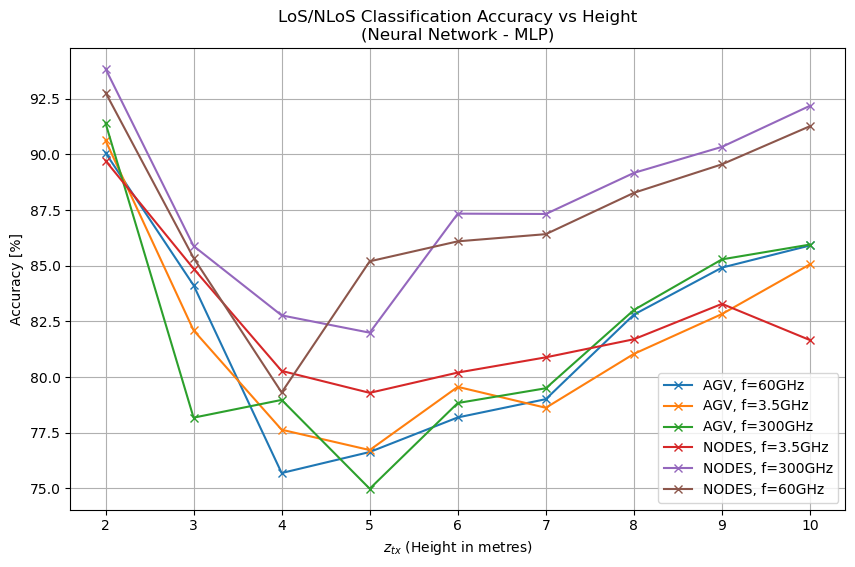

In [35]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency, and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency, and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files, desc=f"Processing {subfolder}"):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items(), desc=f"Training models for {subfolder}"):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Neural Network (MLP) model
        model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# Loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i * 100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height\n(Neural Network - MLP)")
plt.legend()
plt.grid()
plt.show()

In [36]:
# NN-MLP
np.mean(accuracies), np.std(accuracies)

(0.8713774654956707, 0.03740236362017731)

# Dataset Correlation Matrix

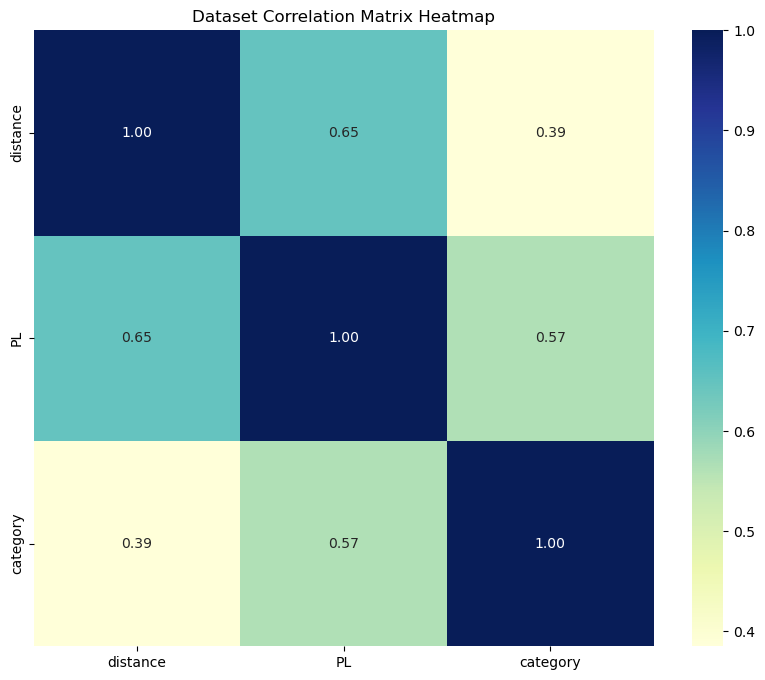

In [91]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import seaborn as sns

dataset_path = "dataset"
subfolders = ["agv",'nodes']  # Two categories
data_list = []

# Collect data by frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in files:
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        freq = parts[5]        # Extract frequency
        h_tx = int(parts[8].split('.')[0])   # Extract height
        
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]  # Labels
        data_list.append(df)

all_data = pd.concat(data_list, ignore_index=True)

corr_matrix = all_data.corr()
# corr_matrix = (corr_matrix+1)
matrix = []
for row in corr_matrix.values:
    new_row = []
    for val in row:
        if val < -0.4:
            new_row.append((val + 1))
        else:
            new_row.append((val+1)/2)
    matrix.append(new_row)
transformed_corr = pd.DataFrame(matrix, index=corr_matrix.index, columns=corr_matrix.columns)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transformed_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Dataset Correlation Matrix Heatmap")
plt.show()